In [1]:
# recorded by hao (2018/03/10)
# rock3.hao@gmail.com
# qinlab.BNU

# training of seaborn 06

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as sps
import matplotlib as mpl
import matplotlib.pyplot as mplt

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


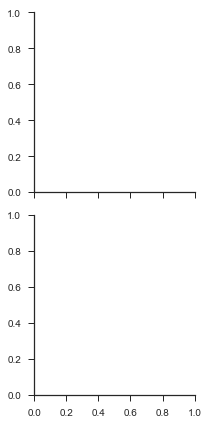

In [4]:
fig01 = sns.FacetGrid(tips, row="time")

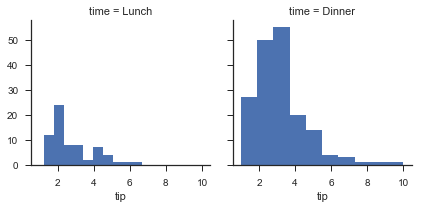

In [5]:
fig02 = sns.FacetGrid(tips, col="time")
fig02.map(mplt.hist, "tip");

In [6]:
#help(sns.FacetGrid.add_legend)

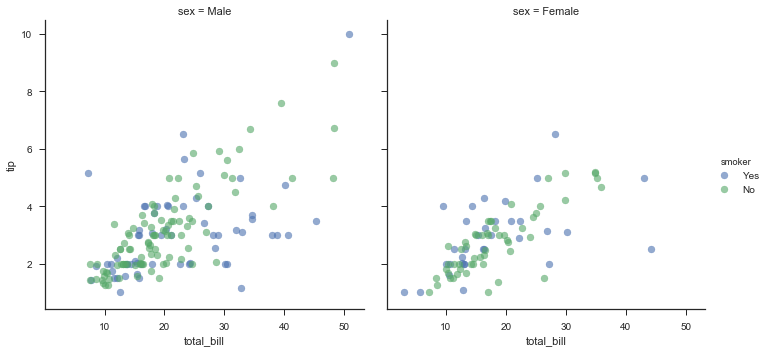

In [7]:
fig03 = sns.FacetGrid(tips, col="sex", hue="smoker",size=5)
fig03.map(mplt.scatter, "total_bill", "tip", alpha=.6)
fig03.add_legend();

In [8]:
#help(sns.regplot)

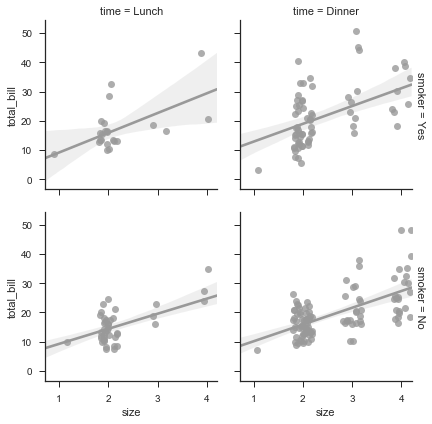

In [9]:
fig04 = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
fig04.map(sns.regplot, "size", "total_bill", color=".6", x_jitter=.2);

In [10]:
#help(sns.barplot)

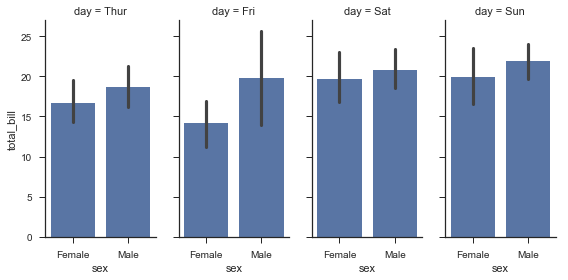

In [11]:
fig05 = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
fig05.map(sns.barplot, "sex", "total_bill", order=["Female", "Male"]);

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


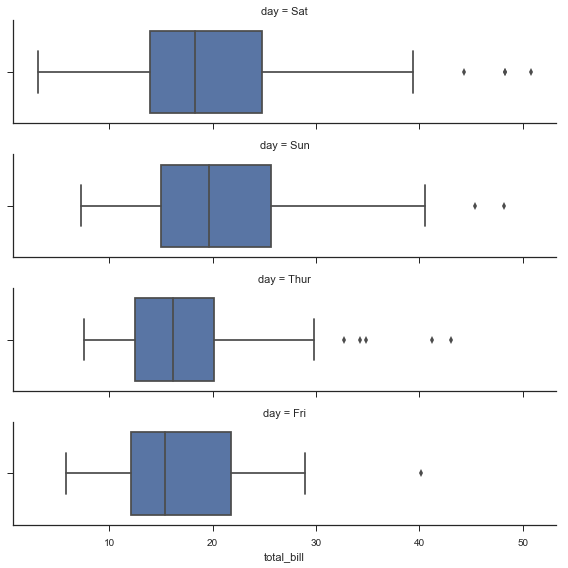

In [12]:
from pandas import Categorical as pdcg
ordered_days01 = tips.day.value_counts().index
print (ordered_days01)

ordered_days02 = pdcg(['Sat', 'Sun', 'Thur', 'Fri'])
fig06 = sns.FacetGrid(tips, row="day", row_order=ordered_days02, size=2, aspect=4)
fig06.map(sns.boxplot, "total_bill", order=ordered_days02); 

{'Lunch': 'seagreen', 'Dinner': 'gray'}


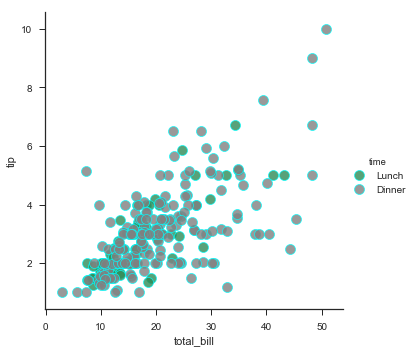

In [13]:
pal = dict(Lunch="seagreen", Dinner="gray")
print(pal)

fig07 = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
fig07.map(mplt.scatter, "total_bill", "tip", s=100, alpha=.8, linewidth=.8, edgecolor="cyan")
fig07.add_legend();

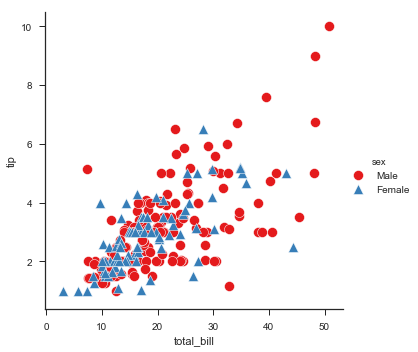

In [14]:
fig08 = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["o", "^"]})
fig08.map(mplt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
fig08.add_legend();

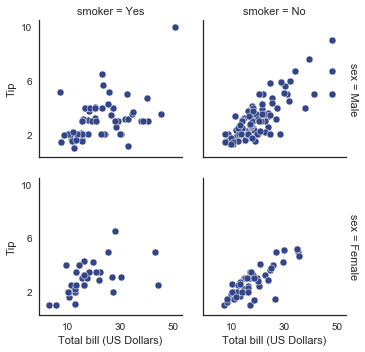

In [15]:
with sns.axes_style("white"):
    fig09 = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
fig09.map(mplt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
fig09.set_axis_labels("Total bill (US Dollars)", "Tip");
fig09.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
fig09.fig.subplots_adjust(wspace=.15, hspace=.15);
# fig09.fig.subplots_adjust(left  = 0.125,right = 0.5,bottom = 0.1,top = 0.9, wspace=.02, hspace=.02)

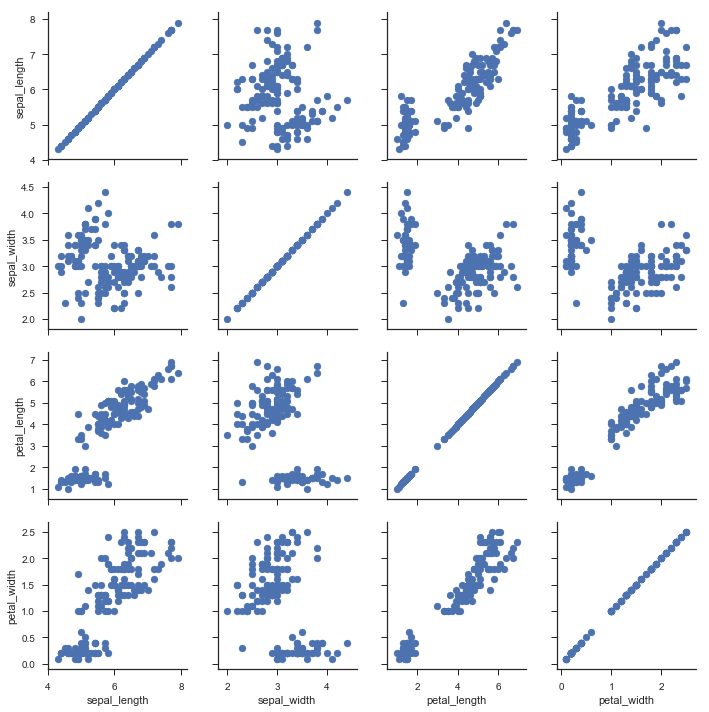

In [16]:
iris = sns.load_dataset("iris")
fig10 = sns.PairGrid(iris)
fig10.map(mplt.scatter);

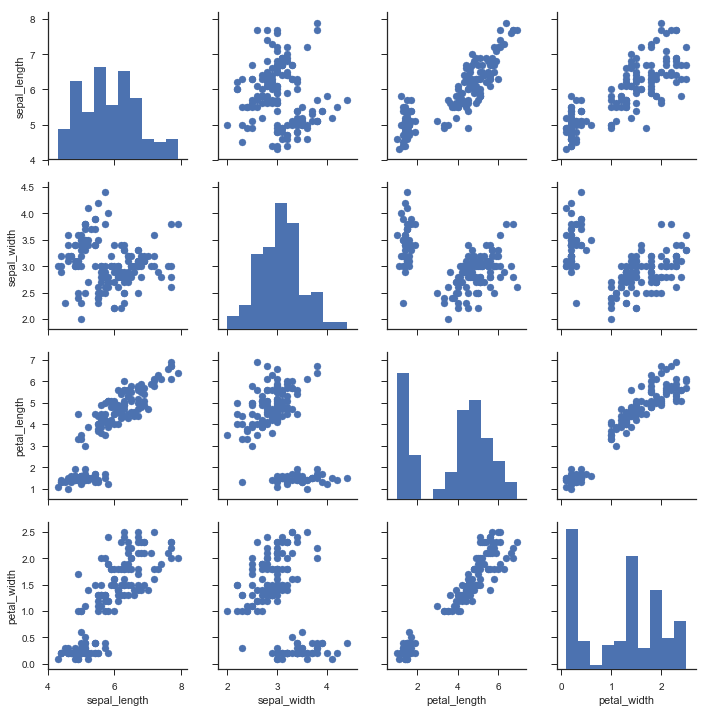

In [17]:
fig10 = sns.PairGrid(iris)
fig10.map_diag(mplt.hist)
fig10.map_offdiag(mplt.scatter);

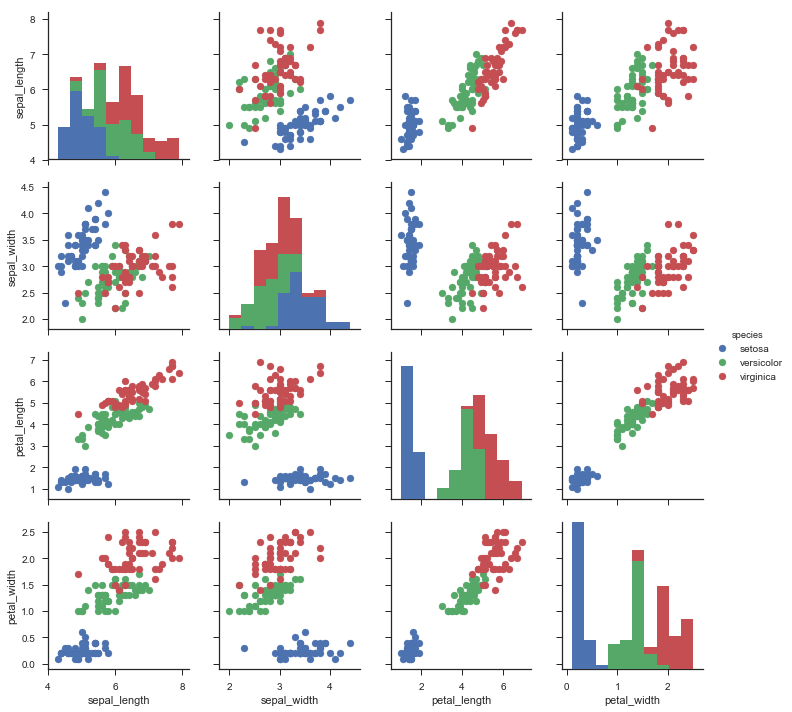

In [18]:
fig11 = sns.PairGrid(iris, hue="species")
fig11.map_diag(mplt.hist)
fig11.map_offdiag(mplt.scatter)
fig11.add_legend();

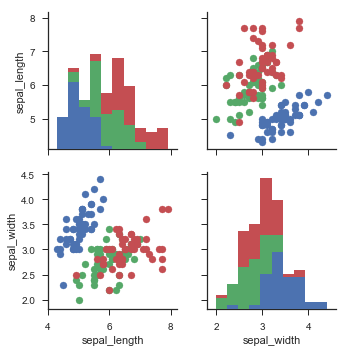

In [19]:
fig12 = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species") # vars 指定需要画的变量
fig12.map_diag(mplt.hist)
fig12.map_offdiag(mplt.scatter);

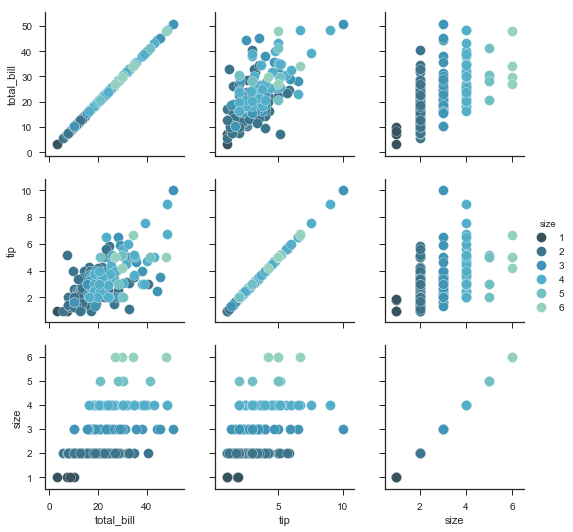

In [20]:
fig13 = sns.PairGrid(tips, hue="size", palette="GnBu_d")
fig13.map(mplt.scatter, s=100, edgecolor="white")
fig13.add_legend();